In [6]:
import os
import pandas as pd

# 현재 노트북 기준으로 경로 설정
base_dir = os.path.dirname(os.getcwd())  # 또는 notebook_dir = os.getcwd() 도 가능
# 상대 경로로 CSV 파일 로드
file_path = os.path.join(base_dir, "data", "판다스", "재무제표샘플데이터.csv")

df = pd.read_csv(file_path, encoding="euc-kr")

In [7]:
display(df.head(5))
display(df.tail(5))

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율
0,대원미디어,2016,9.776068e+10,2.341949e+10,7.434119e+10,9.499312e+10,2.379823e+09,4.804263e+08,76.044057
1,대원미디어,2017,1.043490e+11,2.339887e+10,8.095035e+10,1.207350e+11,6.987071e+09,7.797097e+09,77.576381
2,대원미디어,2018,1.255730e+11,2.402737e+10,1.015450e+11,1.633750e+11,6.412992e+09,4.153603e+09,80.865781
3,대원미디어,2019,1.361390e+11,3.494140e+10,1.011980e+11,1.915460e+11,3.664066e+09,3.181392e+09,74.334031
4,대원미디어,2020,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11,7.227984e+09,6.501209e+09,75.492644


,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율
35,코오롱,2016,3.332550e+12,2.502330e+12,8.302250e+11,3.936860e+12,1.332050e+11,2.745606e+10,24.912568
36,코오롱,2017,3.688370e+12,2.785430e+12,9.029420e+11,4.405820e+12,1.089940e+11,9.852028e+10,24.480781
37,코오롱,2018,3.473910e+12,2.644700e+12,8.292060e+11,4.324490e+12,1.050160e+11,-4.522544e+09,23.869540
38,코오롱,2019,3.618570e+12,2.896670e+12,7.219040e+11,4.284390e+12,1.343990e+11,-2.222093e+10,19.949944
39,코오롱,2020,3.708130e+12,2.849100e+12,8.590350e+11,4.890150e+12,2.714480e+11,1.666080e+11,23.166223


In [10]:
# shape 속성은 데이터프레임의 모양을 튜플로 반환한다. (행의 개수, 열의 개수)
print(df.shape)

(40, 9)


In [12]:
print(df.index)
print(df.columns)
# 데이터프레임의 행 인덱스가 0부터 39까지 자동으로 부여된 숫자 인덱스이며, 1씩 증가하는 형태.

RangeIndex(start=0, stop=40, step=1)
Index(['기업', '연도', '자산총계', '부채총계', '자본총계', '매출액', '영업이익', '당기순이익', '부채비율'], dtype='object')


In [16]:
# 부채비율이 50을 넘으면 True, 아니면 False를 갖는 칼럼인 "부채비율>50"을 생성한다.
df["부채비율>50"] = df["부채비율"] > 50
# 생성한 칼럼에 value_counts 메서드를 적용한다.
display(df["부채비율>50"].value_counts())

부채비율>50
False    22
True     18
Name: count, dtype: int64

In [18]:
# normalize=True시 출현 빈도가 아닌 비율로.
display(df["부채비율>50"].value_counts(normalize = True))

부채비율>50
False    0.55
True     0.45
Name: proportion, dtype: float64

In [20]:
result = df["부채비율>50"].value_counts()
print(result.index[0], result.iloc[0])
# 제일 많은 값의 인덱스를 가져온다. value_counts는 내림차순으로 정렬하니까, 0번째 인덱스가 최빈값.
# 그리고 그 인덱스의 개수를 가져온다. integer location이 0인 숫자.

False 22


<Axes: xlabel='부채비율>50'>

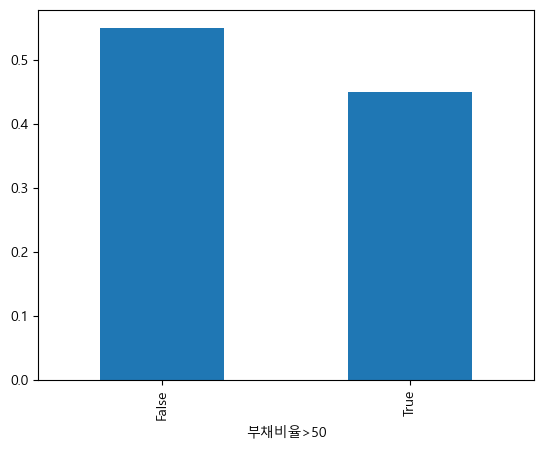

In [24]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정 (윈도우 기준 'Malgun Gothic' 사용)
plt.rc('font', family='Malgun Gothic')
# 마이너스 깨짐 방지
plt.rc('axes', unicode_minus=False)

display(df["부채비율>50"].value_counts(normalize=True).plot(kind="bar"))

<Axes: ylabel='proportion'>

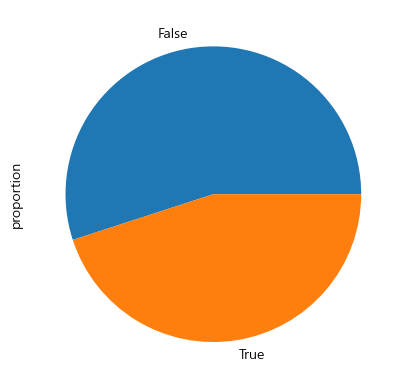

In [26]:
display(df["부채비율>50"].value_counts(normalize = True).plot(kind = "pie"))

In [28]:
# describe 메서드는 여러 기술통계량을 반환함.
display(df.describe())

,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율
count,40.00000,3.600000e+01,3.600000e+01,3.600000e+01,3.300000e+01,3.600000e+01,3.600000e+01,36.000000
mean,2018.00000,7.826858e+11,4.942808e+11,2.884053e+11,8.516524e+11,3.046763e+10,5.503761e+10,53.050860
std,1.43223,1.186074e+12,9.228289e+11,3.339497e+11,1.529365e+12,5.955260e+10,2.421778e+11,21.717672
min,2016.00000,2.949228e+10,6.320311e+09,1.054736e+10,1.249716e+10,-1.162015e+10,-4.402732e+10,18.883905
25%,2017.00000,5.521337e+10,2.387540e+10,2.931327e+10,3.285967e+10,2.295892e+09,-5.813147e+09,36.316790
50%,2018.00000,2.653375e+11,1.312652e+11,1.350985e+11,1.915460e+11,6.904084e+09,3.101122e+09,50.872896
75%,2019.00000,8.460308e+11,2.958292e+11,5.831945e+11,4.924430e+11,1.660627e+10,1.075971e+10,74.623685
max,2020.00000,3.708130e+12,2.896670e+12,1.036090e+12,4.890150e+12,2.714480e+11,1.444440e+12,82.214615


In [31]:
display(df.mean(numeric_only=True))
# 교재에는 단순히 df.mean()만 되어있지만, pandas 2.0 이후로 숫자형 컬럼만 명확히 지정해줘야 함.

연도           2.018000e+03
자산총계         7.826858e+11
부채총계         4.942808e+11
자본총계         2.884053e+11
매출액          8.516524e+11
영업이익         3.046763e+10
당기순이익        5.503761e+10
부채비율         5.305086e+01
부채비율>50      4.500000e-01
부채비율 > 50    4.500000e-01
dtype: float64

In [32]:
display(df.max(numeric_only=True))

연도                      2020
자산총계         3708130000000.0
부채총계         2896670000000.0
자본총계         1036090000000.0
매출액          4890150000000.0
영업이익          271448000000.0
당기순이익        1444440000000.0
부채비율               82.214615
부채비율>50                 True
부채비율 > 50               True
dtype: object

In [34]:
display(df[['매출액','영업이익','당기순이익']].quantile(0.7))
# 열별로 70% 위치에 있는 값을 출력한다.

매출액      4.705058e+11
영업이익     1.466198e+10
당기순이익    6.972623e+09
Name: 0.7, dtype: float64

In [36]:
# groupby 메서드는 조건 변수에 따른 대상 변수의 통계량을 구하는데 쓰인다.
# DataFrame.groupby(조건 변수)[대상 변수].통계 관련 메서드

display(df.groupby("기업")["영업이익"].max())

기업
대원미디어      7.227984e+09
서울바이오시스    2.738493e+10
솔브레인홀딩스    1.056940e+11
쎄미시스코      3.346492e+09
엔에프씨       6.821097e+09
유테크        2.044100e+09
인터지스       1.490524e+10
코오롱        2.714480e+11
Name: 영업이익, dtype: float64

In [40]:
result = df.groupby(["연도", "부채비율>50"])["영업이익"].max()
display(result)
# 연도별로 부채비율이 50 초과인 녀석, 이하인 녀석 각각의 영업이익 최댓값을 구해줌.

display(result.index)
# 둘 이상의 배열로 구성된 인덱스를 멀티 인덱스(multi index)라 한다.

연도    부채비율>50
2016  False      1.332050e+11
      True       1.051390e+11
2017  False      1.089940e+11
      True       1.056940e+11
2018  False      1.050160e+11
      True       6.412992e+09
2019  False      1.343990e+11
      True       1.441873e+10
2020  False      2.714480e+11
      True       1.657536e+10
Name: 영업이익, dtype: float64

MultiIndex([(2016, False),
            (2016,  True),
            (2017, False),
            (2017,  True),
            (2018, False),
            (2018,  True),
            (2019, False),
            (2019,  True),
            (2020, False),
            (2020,  True)],
           names=['연도', '부채비율>50'])

In [44]:
display(df.groupby(["연도", "부채비율>50"], as_index = False)["영업이익"].max())

# as_index=True는 표를 만들었을 때, 그룹핑한 조건들이 왼쪽 테두리에 박혀버리는 느낌 (행 번호 대신)
# as_index=False는 그룹핑한 조건들도 표 안으로 들어와서 일반 컬럼처럼 나열되는 느낌.

,연도,부채비율>50,영업이익
0,2016,False,1.332050e+11
1,2016,True,1.051390e+11
2,2017,False,1.089940e+11
3,2017,True,1.056940e+11
4,2018,False,1.050160e+11
5,2018,True,6.412992e+09
6,2019,False,1.343990e+11
7,2019,True,1.441873e+10
8,2020,False,2.714480e+11
9,2020,True,1.657536e+10


In [50]:
# agg 메서드 사용시 인자로 사용된 리스트의 모든 함수가 모든 대상 변수에 적용된다.
import numpy as np
result = df.groupby("기업", as_index = False)[["영업이익", "매출액"]].agg(["max", "min", "mean"])
display(result)

# FutureWarning은 지금은 동작하지만, 추후 pandas 버전이 올라가면 동작 방식이 달라질 수 있다는 경고.

기업          영업이익                                       매출액  \
                     max           min          mean           max   
0    대원미디어  7.227984e+09  2.379823e+09  5.334387e+09  2.662270e+11   
1  서울바이오시스  2.738493e+10  1.025616e+10  1.811337e+10  4.312820e+11   
2  솔브레인홀딩스  1.056940e+11  4.624502e+09  4.929032e+10  7.755980e+11   
3    쎄미시스코  3.346492e+09 -7.782689e+09 -2.289212e+09  2.502729e+10   
4     엔에프씨  6.821097e+09  3.838921e+09  5.071872e+09  3.332451e+10   
5      유테크  2.044100e+09 -1.162015e+10 -7.330405e+09  5.257768e+10   
6     인터지스  1.490524e+10  6.479330e+09  9.838269e+09  5.019650e+11   
7      코오롱  2.714480e+11  1.050160e+11  1.506124e+11  4.890150e+12   

                               
            min          mean  
0  9.499312e+10  1.673752e+11  
1  3.506400e+11  3.894447e+11  
2  7.225210e+11  7.490595e+11  
3  1.249716e+10  1.803604e+10  
4  2.404593e+10  3.007670e+10  
5  2.835045e+10  3.655787e+10  
6  4.583170e+11  4.792582e+11  
7  3.936860e+12  4.368342e+12

In [53]:
result = df.groupby("기업", as_index = False)[["영업이익", "매출액"]].agg({"영업이익":["max", "min"],
                                                                  "매출액":["mean"]})
display(result)

기업          영업이익                         매출액
                     max           min          mean
0    대원미디어  7.227984e+09  2.379823e+09  1.673752e+11
1  서울바이오시스  2.738493e+10  1.025616e+10  3.894447e+11
2  솔브레인홀딩스  1.056940e+11  4.624502e+09  7.490595e+11
3    쎄미시스코  3.346492e+09 -7.782689e+09  1.803604e+10
4     엔에프씨  6.821097e+09  3.838921e+09  3.007670e+10
5      유테크  2.044100e+09 -1.162015e+10  3.655787e+10
6     인터지스  1.490524e+10  6.479330e+09  4.792582e+11
7      코오롱  2.714480e+11  1.050160e+11  4.368342e+12

In [56]:
# 결측이란 값이 없는 데이터. 결측 처리도 중요하다.
np_nan_value = np.nan
float_nan_value = float('nan')
print(type(np_nan_value), np_nan_value)
print(type(float_nan_value), float_nan_value)

<class 'float'> nan
<class 'float'> nan


In [60]:
s_df = df.iloc[4:8, 2:6]
display(s_df)
display(s_df.isnull())  # 결측이면 True 반환 
display(s_df.notnull()) # 결측이면 False 반환

,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


,자산총계,부채총계,자본총계,매출액
4,False,False,False,False
5,True,True,True,True
6,True,True,True,True
7,False,False,False,False


,자산총계,부채총계,자본총계,매출액
4,True,True,True,True
5,False,False,False,False
6,False,False,False,False
7,True,True,True,True


In [63]:
display(df.isnull().sum(axis=0)) # df의 열별 결측 수 구하기

기업           0
연도           0
자산총계         4
부채총계         4
자본총계         4
매출액          7
영업이익         4
당기순이익        4
부채비율         4
부채비율>50      0
부채비율 > 50    0
dtype: int64

In [65]:
# dropna는 행에 결측치 하나라도 있다면 그 행 전체를 삭제함.
display(df.dropna().shape)

# 다만, 위 코드는 inplace=True도 아니고 df에 저장도 안했기에 원본 df는 변화 없음.

(33, 11)

In [66]:
# fillna는 결측을 특정한 값으로 채운다.
display(s_df.fillna(0))

,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


In [77]:
# 이전 행으로 결측 대체.
display(s_df.ffill())
# 이후 행으로 결측 대체
display(s_df.bfill())

,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
6,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


,자산총계,부채총계,자본총계,매출액
4,1.446900e+11,3.545975e+10,1.092300e+11,2.662270e+11
5,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11
6,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11
7,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11


In [83]:
# 데이터 행의 중복은 drop_duplicates 메서드를 사용한다.
display(df.drop_duplicates(["기업"], keep = "first"))

# 기업 칼럼을 기준으로 중복 제거, 중복이 있는 행에 대해서는 맨 앞 행 제외 나머지 행을 모두 제거.  

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율>50,부채비율 > 50
0,대원미디어,2016,9.776068e+10,2.341949e+10,7.434119e+10,9.499312e+10,2.379823e+09,4.804263e+08,76.044057,True,True
5,서울바이오시스,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
10,솔브레인홀딩스,2016,8.293910e+11,2.684180e+11,5.609730e+11,7.225210e+11,1.051390e+11,7.452030e+10,67.636787,True,True
15,쎄미시스코,2016,3.553654e+10,6.320311e+09,2.921623e+10,1.249716e+10,1.025104e+09,1.621465e+09,82.214615,True,True
20,엔에프씨,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
25,유테크,2016,6.425440e+10,3.822314e+10,2.603126e+10,2.835045e+10,-1.027313e+10,-1.166355e+10,40.512810,False,False
30,인터지스,2016,5.141900e+11,2.933420e+11,2.208480e+11,4.653970e+11,1.072902e+10,7.372879e+09,42.950605,False,False
35,코오롱,2016,3.332550e+12,2.502330e+12,8.302250e+11,3.936860e+12,1.332050e+11,2.745606e+10,24.912568,False,False


In [85]:
# unique 메서드는 시리즈(Series)나 컬럼 안에 있는 값들 중에서 중복 없이 한 번만 나열해 ndarray 형태로 반환한다.
display(df["기업"].unique())

array(['대원미디어', '서울바이오시스', '솔브레인홀딩스', '쎄미시스코', '엔에프씨', '유테크', '인터지스',
       '코오롱'], dtype=object)

In [87]:
# sort_values는 데이터 정렬 관련 메서드.
display(df.sort_values(["영업이익", "당기순이익"], ascending = False).head(10))

# "영업이익"을 "당기순이익"보다 먼저 입력했으므로, "영업이익" 내림차순 한 뒤, "영업이익"이 같을 때만 "당기순이익" 내림차.

,기업,연도,자산총계,부채총계,자본총계,매출액,영업이익,당기순이익,부채비율,부채비율>50,부채비율 > 50
39,코오롱,2020,3.708130e+12,2.849100e+12,8.590350e+11,4.890150e+12,2.714480e+11,1.666080e+11,23.166223,False,False
38,코오롱,2019,3.618570e+12,2.896670e+12,7.219040e+11,4.284390e+12,1.343990e+11,-2.222093e+10,19.949944,False,False
35,코오롱,2016,3.332550e+12,2.502330e+12,8.302250e+11,3.936860e+12,1.332050e+11,2.745606e+10,24.912568,False,False
36,코오롱,2017,3.688370e+12,2.785430e+12,9.029420e+11,4.405820e+12,1.089940e+11,9.852028e+10,24.480781,False,False
11,솔브레인홀딩스,2017,8.959500e+11,2.460910e+11,6.498590e+11,7.755980e+11,1.056940e+11,4.308634e+10,72.532984,True,True
10,솔브레인홀딩스,2016,8.293910e+11,2.684180e+11,5.609730e+11,7.225210e+11,1.051390e+11,7.452030e+10,67.636787,True,True
37,코오롱,2018,3.473910e+12,2.644700e+12,8.292060e+11,4.324490e+12,1.050160e+11,-4.522544e+09,23.869540,False,False
9,서울바이오시스,2020,5.828830e+11,3.635450e+11,2.193370e+11,4.312820e+11,2.738493e+10,1.964753e+10,37.629758,False,False
7,서울바이오시스,2018,4.140130e+11,2.530460e+11,1.609670e+11,3.864120e+11,1.669902e+10,3.600975e+09,38.879764,False,False
14,솔브레인홀딩스,2020,1.339380e+12,3.032910e+11,1.036090e+12,NaN,1.657536e+10,1.444440e+12,77.355811,True,True


그런데 위 결과는 좀 misled하다... 영업이익은 큰데 당기순이익은 낮은 기업이 먼저 튀어나올수도.
<br>해결법:
1) **조건을 추가해 컷오프 적용**<br>
df_filtered = df[(df["영업이익"] > 1000000000) & (df["당기순이익"] > 0)]<br>
영업이익이 일정 이상이면서, 당기순이익도 최소한 플러스인 기업들 선정.

2) **2차 기준 설정**<br>
df["순이익률"] = df["당기순이익"] / df["매출액"]
df.sort_values(["영업이익", "순이익률"], ascending=False)<br>
영업이익 큰데 수익성도 좋은 기업들 선정.